In [23]:
import tensorflow as tf
import xlrd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = xlrd.open_workbook('../data/fire_theft.xls')


*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [25]:
sheet = data.sheet_by_index(0)

In [26]:
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])

In [27]:
n_samples = sheet.nrows - 1 

In [28]:
X = tf.placeholder(dtype=tf.float32,name='X')
Y = tf.placeholder(dtype=tf.float32,name='y')

In [29]:
w = tf.Variable(0.0, name='weights',dtype=tf.float32)
b = tf.Variable(0.0, name='bias',dtype=tf.float32)

In [30]:
y_predicted = X*w + b

In [31]:
loss = tf.square(y_predicted - Y)

In [32]:
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    
    for i in range(1000):
        total_loss=0
        for x,y in data:
            _,l = sess.run([optimize,loss],feed_dict={X:x,Y:y})
            total_loss+=l
        
        print("iteration:{} loss:{} ".format(i,total_loss))
    w, b = sess.run([w, b]) 

    
    

iteration:0 loss:86924.5412027 
iteration:1 loss:88914.5190442 
iteration:2 loss:87876.7143661 
iteration:3 loss:86877.3379401 
iteration:4 loss:85914.8297317 
iteration:5 loss:84987.615082 
iteration:6 loss:84094.2800033 
iteration:7 loss:83233.4302298 
iteration:8 loss:82403.7665273 
iteration:9 loss:81603.9844878 
iteration:10 loss:80832.9094593 
iteration:11 loss:80089.3749627 
iteration:12 loss:79372.2909245 
iteration:13 loss:78680.5796213 
iteration:14 loss:78013.2712825 
iteration:15 loss:77369.3707182 
iteration:16 loss:76747.964795 
iteration:17 loss:76148.1864348 
iteration:18 loss:75569.1755601 
iteration:19 loss:75010.1609557 
iteration:20 loss:74470.3043831 
iteration:21 loss:73948.9434383 
iteration:22 loss:73445.3334597 
iteration:23 loss:72958.7824577 
iteration:24 loss:72488.6766688 
iteration:25 loss:72034.3942482 
iteration:26 loss:71595.3040081 
iteration:27 loss:71170.8779666 
iteration:28 loss:70760.5345077 
iteration:29 loss:70363.7949407 
iteration:30 loss:6998

iteration:248 loss:57679.0914784 
iteration:249 loss:57678.2968591 
iteration:250 loss:57677.5097307 
iteration:251 loss:57676.7663462 
iteration:252 loss:57676.0078867 
iteration:253 loss:57675.2977763 
iteration:254 loss:57674.5780476 
iteration:255 loss:57673.9202395 
iteration:256 loss:57673.2535067 
iteration:257 loss:57672.6152483 
iteration:258 loss:57671.9883851 
iteration:259 loss:57671.3709053 
iteration:260 loss:57670.7992076 
iteration:261 loss:57670.2133327 
iteration:262 loss:57669.6474698 
iteration:263 loss:57669.0932066 
iteration:264 loss:57668.5641161 
iteration:265 loss:57668.05497 
iteration:266 loss:57667.5315677 
iteration:267 loss:57667.0484688 
iteration:268 loss:57666.5619416 
iteration:269 loss:57666.0954233 
iteration:270 loss:57665.6328319 
iteration:271 loss:57665.1884957 
iteration:272 loss:57664.7631605 
iteration:273 loss:57664.3388485 
iteration:274 loss:57663.9351816 
iteration:275 loss:57663.5347812 
iteration:276 loss:57663.1509326 
iteration:277 lo

iteration:500 loss:57649.429675 
iteration:501 loss:57649.429675 
iteration:502 loss:57649.429675 
iteration:503 loss:57649.429675 
iteration:504 loss:57649.429675 
iteration:505 loss:57649.429675 
iteration:506 loss:57649.429675 
iteration:507 loss:57649.429675 
iteration:508 loss:57649.429675 
iteration:509 loss:57649.429675 
iteration:510 loss:57649.429675 
iteration:511 loss:57649.429675 
iteration:512 loss:57649.429675 
iteration:513 loss:57649.429675 
iteration:514 loss:57649.429675 
iteration:515 loss:57649.429675 
iteration:516 loss:57649.429675 
iteration:517 loss:57649.429675 
iteration:518 loss:57649.429675 
iteration:519 loss:57649.429675 
iteration:520 loss:57649.429675 
iteration:521 loss:57649.429675 
iteration:522 loss:57649.429675 
iteration:523 loss:57649.429675 
iteration:524 loss:57649.429675 
iteration:525 loss:57649.429675 
iteration:526 loss:57649.429675 
iteration:527 loss:57649.429675 
iteration:528 loss:57649.429675 
iteration:529 loss:57649.429675 
iteration:

iteration:752 loss:57649.429675 
iteration:753 loss:57649.429675 
iteration:754 loss:57649.429675 
iteration:755 loss:57649.429675 
iteration:756 loss:57649.429675 
iteration:757 loss:57649.429675 
iteration:758 loss:57649.429675 
iteration:759 loss:57649.429675 
iteration:760 loss:57649.429675 
iteration:761 loss:57649.429675 
iteration:762 loss:57649.429675 
iteration:763 loss:57649.429675 
iteration:764 loss:57649.429675 
iteration:765 loss:57649.429675 
iteration:766 loss:57649.429675 
iteration:767 loss:57649.429675 
iteration:768 loss:57649.429675 
iteration:769 loss:57649.429675 
iteration:770 loss:57649.429675 
iteration:771 loss:57649.429675 
iteration:772 loss:57649.429675 
iteration:773 loss:57649.429675 
iteration:774 loss:57649.429675 
iteration:775 loss:57649.429675 
iteration:776 loss:57649.429675 
iteration:777 loss:57649.429675 
iteration:778 loss:57649.429675 
iteration:779 loss:57649.429675 
iteration:780 loss:57649.429675 
iteration:781 loss:57649.429675 
iteration:

In [17]:
b

16.921144

In [18]:
y_predicted

<tf.Tensor 'add:0' shape=<unknown> dtype=float32>

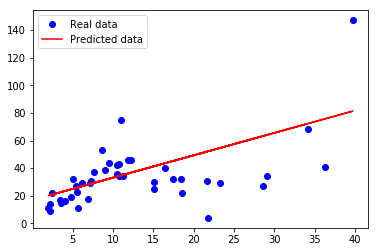

In [19]:

X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()